# Математические пакеты

## Лабораторная работа №2: Дискретное преобразование Фурье
Выполнил студент гр. 9381 Давыдов Дмитрий.
### Цель работы
Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.
### Задачи лабораторной работы
1. Используя ДПФ построить траекторию основного тона ($F_0$) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.

### Выполнение работы

#### Подключение библиотек

In [6]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import more_itertools

from scipy.fft import fft
from scipy.io import  wavfile
from scipy import signal

#### Загрузка запаси голоса

Формат записи - моно-сигнал, 16000гц.

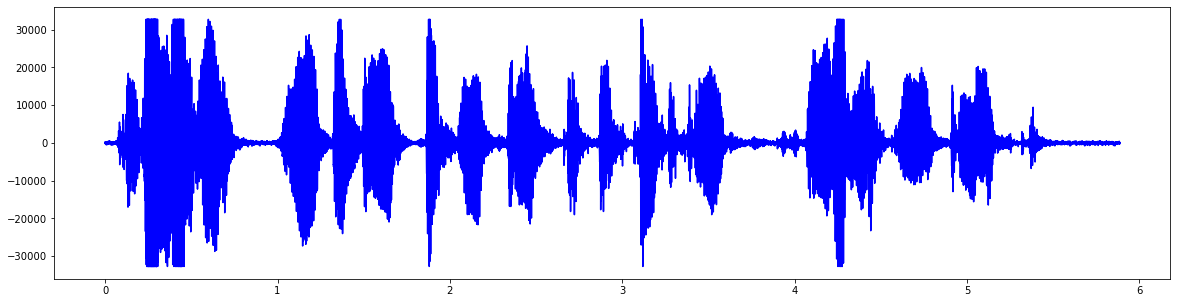

In [14]:
rate, data = wavfile.read('my_record.wav')
plt.figure(figsize=(20, 5))
plt.plot(np.linspace(0, len(data) / rate, num=len(data)), data, color='blue')
plt.show()

#### Траектория основного тона ($F_0$)

In [65]:
N = 512 
S_r = round(rate / N)
offset = int(0.25 * N)

intervals = list(more_itertools.windowed(data, n=N, step=offset))
intervals[len(intervals)-1] = [interval for interval in intervals[len(intervals) - 1] if interval != None]
intervals = [interval * np.hamming(len(interval)) for interval in intervals]

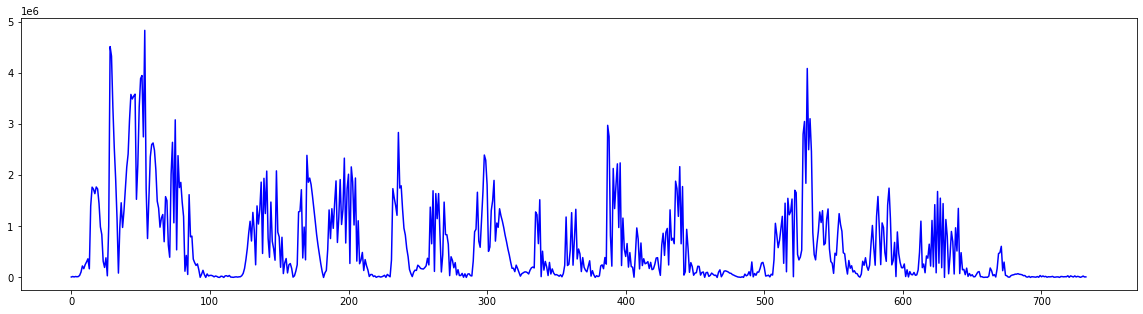

In [66]:
intervals = [fft(interval) for interval in intervals]
spectrum = [sum([segment**2 for segment in interval[:int(len(interval) / 2)]])**0.5 for interval in intervals]
spectrum = np.array([interval.real for interval in spectrum])

plt.figure(figsize=(20, 5))
plt.plot(spectrum, color='blue')
plt.show()

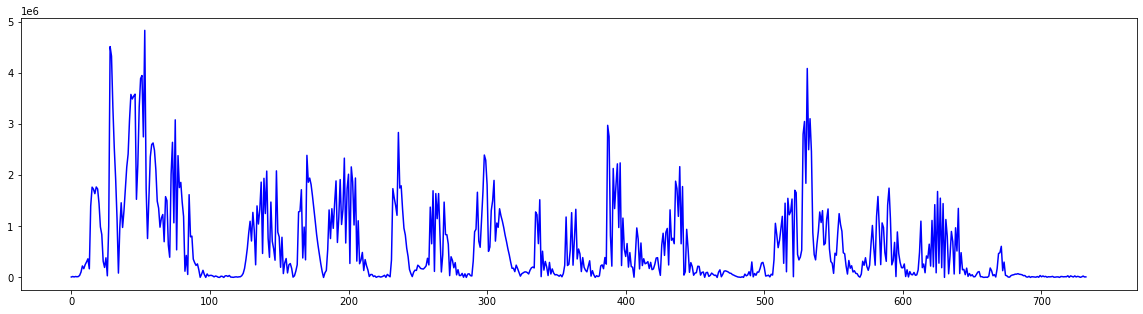

In [67]:
F_0 = []
for index in range(0, len(spectrum), S_r):
    interval = np.array(spectrum[index : index + S_r])
    if interval.max() <= interval.mean() * 2:
        F_0 += np.zeros(len(interval)).tolist()
    else:
        F_0 += interval.tolist()

plt.figure(figsize=(20, 5))
plt.plot(F_0, color='blue')
plt.show()

#### Траектория основного тона ($F_1$, $F_2$, $F_3$)

In [68]:
def amplitudeCoefChange(F_0, coef):
    formant = []
    for index in range(0, len(F_0)):
        if coef * index - 1 in range(len(F_0)) and coef * index + 1 in range(len(F_0)):
            maximum = max(F_0[coef * index - 1], F_0[coef * index + 1])
            if F_0[index] > maximum * (coef * 2 + 1):
                formant.append(maximum)
            else:
                formant.append(0) 
    return formant

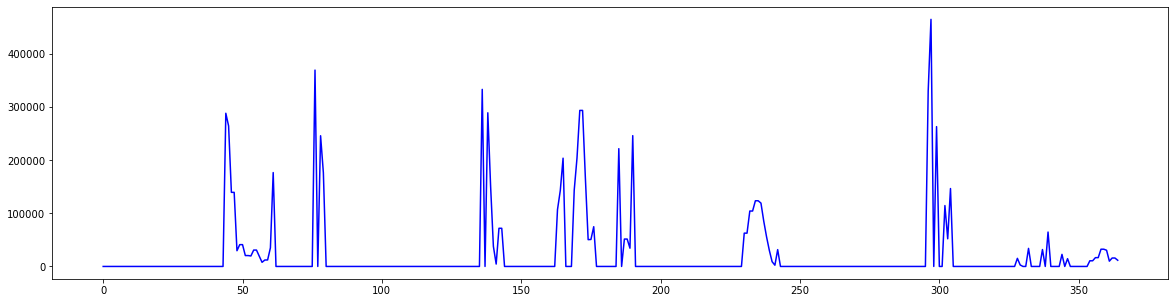

In [69]:
plt.figure(figsize=(20, 5))
plt.plot(amplitudeCoefChange(F_0, 2), color='blue')
plt.show()

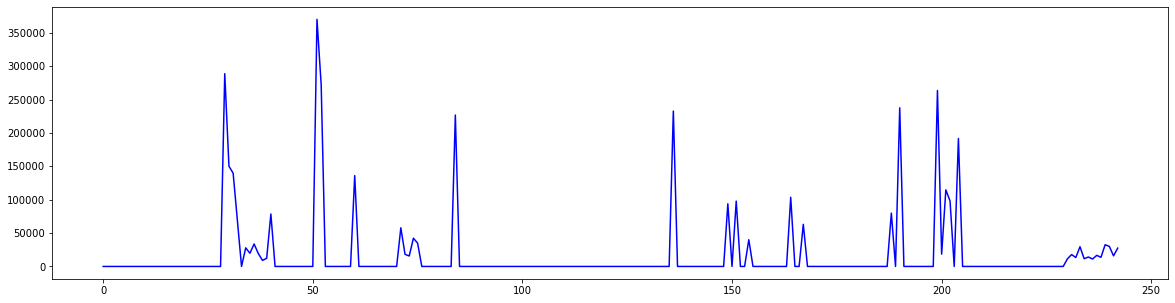

In [70]:
plt.figure(figsize=(20, 5))
plt.plot(amplitudeCoefChange(F_0, 3), color='blue')
plt.show()

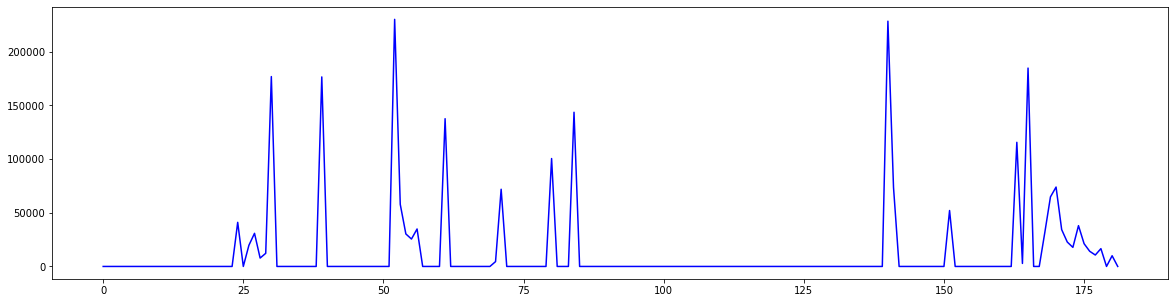

In [71]:
plt.figure(figsize=(20, 5))
plt.plot(func(F_0, 4), color='blue')
plt.show()

#### Сонограмма

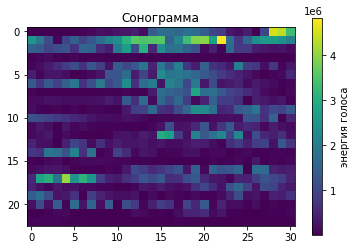

In [72]:
sonogram = np.array([list(spectrum[index : index + S_r]) for index in range(0, len(spectrum), S_r)][:-1])
sonogram.reshape(len(sonogram), len(sonogram[0]))

plt.title('Сонограмма')
plt.imshow(sonogram)
plt.colorbar(label="энергия голоса")
plt.show()

### Вывод
В данной лабораторной работе было изучено дискретное преобразование Фурье, были построены траектории основного тона, вторая, третья, четвертая форманты и сонограмма собственного записанного голоса.